# Summary

# Imports

In [10]:
#Here I import all the Libraries needed to run the project:!pip install numpy
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ensure that plots are shown inline in Jupyter notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
import pickle  # No need to install pickle, it is part of the Python standard library


In [94]:

# !pip install sweetviz
# import sweetviz as sv
# report = sv.analyze(df1)
# report.show_html()

# Loading Dataset

In [21]:
df = pd.read_csv('C:/Users/lizka/Downloads/file.csv')

import io
import ipywidgets as widgets
from IPython.display import display
from IPython.display import display
import ipywidgets as widgets
from pandas import read_csv

upload_widget = widgets.FileUpload(accept='.csv')
display(upload_widget)

# Wait for the upload and read the file
def on_upload_change(change):
    uploaded_files = upload_widget.value
    for filename in uploaded_files:
        # Read the uploaded file
        df = pd.read_csv(io.BytesIO(uploaded_files[filename]['content']))
        # Display the DataFrame
        print(df.head())

# Set the function to call when files are uploaded
upload_widget.observe(on_upload_change, names='value')



FileUpload(value={}, accept='.csv', description='Upload')

# Exploration Basic Data


In [22]:
#df.head() is a method in pandas that returns the first 5 rows of the DataFrame by default.
#It’s a quick way to inspect the structure of  data and ensure it has been loaded correctly.
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [23]:
#df.tail() is a method in pandas that returns the last 5 rows of the DataFrame by default.
# This is useful for inspecting the end of your dataset.
#   nan
df.tail()

AttributeError: 'Index' object has no attribute '_format_flat'

       Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
52950       52950         NaN    NaN      NaN            NaN             NaN   
52951       52951         NaN    NaN      NaN            NaN             NaN   
52952       52952         NaN    NaN      NaN            NaN             NaN   
52953       52953         NaN    NaN      NaN            NaN             NaN   
52954       52954         NaN    NaN      NaN            NaN             NaN   

      Transaction_Date Product_SKU Product_Description      Product_Category  \
52950              NaN         NaN                 NaN            Gift Cards   
52951              NaN         NaN                 NaN  Notebooks & Journals   
52952              NaN         NaN                 NaN               Android   
52953              NaN         NaN                 NaN               Android   
52954              NaN         NaN                 NaN               Android   

       ...  Avg_Price  Delivery_Charge

In [25]:
#df.info() is a method in pandas that provides a concise summary of the DataFrame.
# It's one of the first steps to understand the structure and basic information about your dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [26]:
#df.describe() is a method in pandas that generates descriptive statistics for numerical columns in the DataFrame.
#It provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.
#(.T), we present each column as a row, making it easier to interpret the summary statistics.
#Count: The number of non-null entries.
# Mean: The average value.
# Std (Standard Deviation): Measures the spread of the data (התפשטות הנתונים).
# Min: The smallest value in the column.
# 25%, 50%, 75%: The quartiles, representing the distribution of the data(התפלגות הנתונים).
# Max: The largest value in the column.
#

df.describe().T

AttributeError: 'Index' object has no attribute '_format_flat'

                    count          mean           std       min       25%  \
Unnamed: 0        52955.0  26477.000000  15286.936089      0.00  13238.50   
CustomerID        52924.0  15346.709810   1766.556020  12346.00  13869.00   
Tenure_Months     52924.0     26.127995     13.478285      2.00     15.00   
Transaction_ID    52924.0  32409.825675   8648.668977  16679.00  25384.00   
Quantity          52924.0      4.497638     20.104711      1.00      1.00   
Avg_Price         52924.0     52.237646     64.006882      0.39      5.70   
Delivery_Charges  52924.0     10.517630     19.475613      0.00      6.00   
GST               52924.0      0.137462      0.045825      0.05      0.10   
Offline_Spend     52924.0   2830.914141    936.154247    500.00   2500.00   
Online_Spend      52924.0   1893.109119    807.014092    320.25   1252.63   
Month             52955.0      6.652800      3.333664      1.00      4.00   
Discount_pct      52555.0     19.953382      8.127108     10.00     10.00   

In [27]:
# #descriptive statistics for the categorical (object-type) columns in the DataFrame.
# #Count: The number of non-null entries.
# Unique: The number of unique values.
# Top: The most frequent (or mode) value.
# Freq: The frequency of the top value.
df.describe(include='object').T

AttributeError: 'Index' object has no attribute '_format_flat'

                     count unique  \
Gender               52924      2   
Location             52924      5   
Transaction_Date     52924    365   
Product_SKU          52924   1145   
Product_Description  52924    404   
Product_Category     52955     21   
Coupon_Status        52924      3   
Date                 52924    365   
Coupon_Code          52555     48   

                                                                   top   freq  
Gender                                                               F  33007  
Location                                                       Chicago  18380  
Transaction_Date                                            2019-11-27    335  
Product_SKU                                             GGOENEBJ079499   3511  
Product_Description  Nest Learning Thermostat 3rd Gen-USA - Stainle...   3511  
Product_Category                                               Apparel  18126  
Coupon_Status                                                  Clicke

# Drop Unused Data

In [28]:
#emove specific columns, you streamline your dataset, focusing only on the relevant data
colums = ['Unnamed: 0','Transaction_Date', 'Transaction_ID', 'Product_SKU','Coupon_Code']
df.drop(colums,axis=1,inplace=True)
# axis = 1 במקומות שיש עמודה,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52955 non-null  object 
 6   Quantity             52924 non-null  float64
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
 10  GST                  52924 non-null  float64
 11  Date                 52924 non-null  object 
 12  Offline_Spend        52924 non-null  float64
 13  Online_Spend         52924 non-null  float64
 14  Month                52955 non-null  int64  
 15  Discount_pct         52555 non-null 

# Check Missing Data


In [29]:
#df.isnull().sum() command is used to identify missing values (null values) in each column of the DataFrame.
df.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Discount_pct           400
dtype: int64

In [30]:
# remove incomplite records
df.dropna(inplace=True)
df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Discount_pct           0
dtype: int64

In [31]:
# new shape of the data
df.shape

(52524, 16)

# Checkin repeated rows

In [32]:
#Returns a boolean Series where True indicates a duplicate row (excluding the first occurrence)
# and False indicates a unique row.

df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(48672, 16)

# Change Object to Categorical

In [33]:
#Converting columns to the category data type helps reduce memory usage and can improve performance
#for large datasets with repeated text values.

df.info()
obj_colums = ['Gender', 'Location', 'Product_Description', 'Product_Category','Coupon_Status']
df[obj_colums] = df[obj_colums].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           48672 non-null  float64
 1   Gender               48672 non-null  object 
 2   Location             48672 non-null  object 
 3   Tenure_Months        48672 non-null  float64
 4   Product_Description  48672 non-null  object 
 5   Product_Category     48672 non-null  object 
 6   Quantity             48672 non-null  float64
 7   Avg_Price            48672 non-null  float64
 8   Delivery_Charges     48672 non-null  float64
 9   Coupon_Status        48672 non-null  object 
 10  GST                  48672 non-null  float64
 11  Date                 48672 non-null  object 
 12  Offline_Spend        48672 non-null  float64
 13  Online_Spend         48672 non-null  float64
 14  Month                48672 non-null  int64  
 15  Discount_pct         48672 non-null 

# Date Formaiting

In [34]:
# A pandas function that converts a column or series containing date information in string format into a datetime object,
# which allows for easier manipulation and analysis of dates.
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           48672 non-null  float64 
 1   Gender               48672 non-null  category
 2   Location             48672 non-null  category
 3   Tenure_Months        48672 non-null  float64 
 4   Product_Description  48672 non-null  category
 5   Product_Category     48672 non-null  category
 6   Quantity             48672 non-null  float64 
 7   Avg_Price            48672 non-null  float64 
 8   Delivery_Charges     48672 non-null  float64 
 9   Coupon_Status        48672 non-null  category
 10  GST                  48672 non-null  float64 
 11  Date                 48672 non-null  object  
 12  Offline_Spend        48672 non-null  float64 
 13  Online_Spend         48672 non-null  float64 
 14  Month                48672 non-null  int64   
 15  Discount_pct       

# Export Clean Data To Parquet Format

In [35]:
#Saving to Parquet: Use df.to_parquet() to save DataFrames in a columnar format that is efficient for storage and processing,
# particularly with large datasets and big data frameworks.
#Saving to Pickle: Use df.to_pickle() to serialize and save DataFrames in a binary format
# that is convenient for Python-specific applications.

df.to_parquet('/content/file_clean.pqt')
df.to_pickle('/content/file_clean.pkl')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [37]:
#This command reads the Parquet file located at the specified path and loads it into a new DataFrame named df1
df1 = pd.read_parquet('/content/file_clean.pqt')
df1.info()

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

# Data Protocol

In [38]:

# Type of valaues
#This command exports the data types of each column in the DataFrame df1 to an Excel file.
df1.dtypes.to_excel("file_clean.xlsx",
             sheet_name='data_type')
# Maximum valaues
#This command exports the maximum values of all numeric columns in df1 to an Excel file.
df1.select_dtypes(include='number').max().to_excel("max_file_clean.xlsx",
             sheet_name='max_numeric')

# Minimum Values
#This command exports the median values of numeric columns in df1 to an Excel file.
df1.select_dtypes(include='number').median().to_excel("min_file_clean.xlsx",
             sheet_name='min_numeric')
# Missing Values
#his command exports the count of missing values in each column to an Excel file.
df1.isnull().sum(axis=0).to_excel("NA_file_clean.xlsx",
             sheet_name='NA')

# exporting results to the protocol
#This command exports the count of unique values in each column to an Excel file.
df1.nunique().to_excel("unique_file_clean.xlsx",
             sheet_name='unique')

NameError: name 'df1' is not defined

# Descriptive Statistics


In [39]:
#This command installs the ydata_profiling library, which is used for generating detailed profiling reports of data.
!pip install --upgrade Pillow
!pip install ydata_profiling

from ydata_profiling import ProfileReport

# Assuming df1 is your DataFrame
profile = ProfileReport(df1, title="Profiling Report", explorative=False)

# Display the profile report
profile

# Save the report to an HTML file
profile.to_file("output.html")



#HIGH CARDINALITY: This term indicates that the column contains a large number of unique values relative to the size of the dataset.
#In this case, the column has high cardinality with 395 distinct values.



NameError: name 'df1' is not defined

In [ ]:
profile.to_file("output.html")

# Target Value

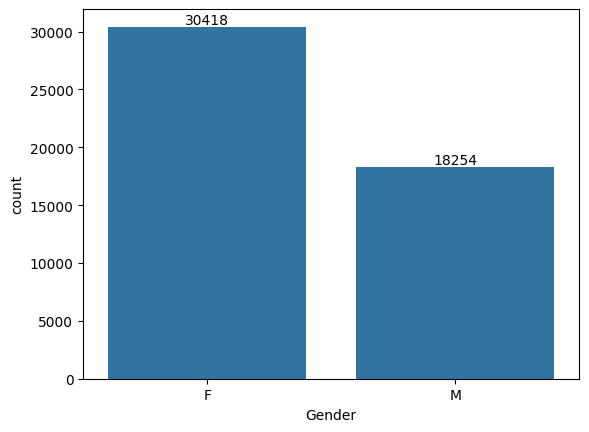

In [113]:
#Use sns.countplot() to visualize the distribution of categorical data, such as the Gender column.
ax= sns.countplot(data=df1,x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

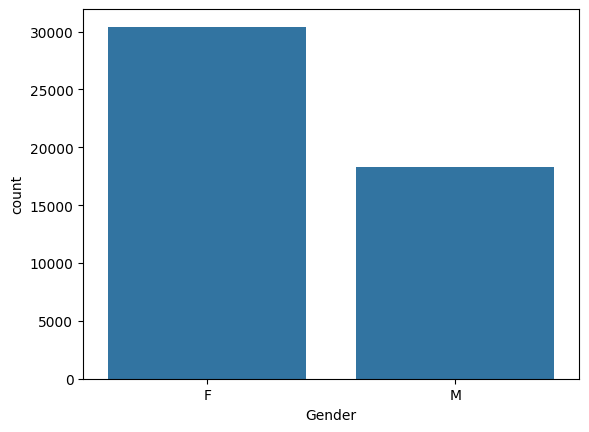

In [114]:
sns.countplot(x='Gender', data=df1)

# Skewness

In [115]:
#החשיבות של התייחסות לעיוות כדי להבטיח תוצאות מדויקות ואמינות בניתוח נתונים ומידול.
#עד כמה שההתפלגות לא סימטרית, כמה זנב

def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(df1.select_dtypes(include='number').skew(),columns=['skewness']).sort_values(by='skewness', ascending=False)

#GST (-0.40):מוטה לערכים גבוהים יותר, מה שמצביע על כך שרוב סכומי ה-GST גבוהים יותר עם פחות סכומים נמוכים יותר. gst מוטה לרעה בינונית. ההתפלגות של
#Offline_Spend (-0.31): מוטה מעט לרעה. זה מצביע על כך שרוב ערכי ההוצאות הלא מקוונות גבוהים יותר, כאשר כמה ערכים נמוכים יותר מטים את ההתפלגות שמאלה
#Discount_pct (0.01): קרוב מאוד לאפס הטיה, מה שמצביע על כך שהתפלגות אחוז ההנחה היא סימטרית בקירוב.
#מזהה לקוח (-0.02): הפצה כמעט סימטרית של מזהי לקוחות.
#קביעות_חודשי (-0.07): התפלגות כמעט סימטרית של קביעות הלקוחות בחודשים.
#חודש (-0.08): קרוב מאוד להתפלגות סימטרית של חודשים.
#Online_Spend (0.45): מוטה מעט באופן חיובי. ההתפלגות קרובה יחסית לנורמה אך עם הטיה קלה ימינה.
#ליד אפס עיוות:
#Avg_Price (1.74): מוטה באופן מתון חיובי. רוב המחירים הממוצעים הם בצד התחתון, עם כמה מקרים של מחירים גבוהים.
#תפוצה כמעט נורמלית:
#דמי משלוח (11.74): מוטה מאוד. זה מצביע על כך שרוב דמי המשלוח נמוכים, עם כמה מקרים של חיובים גבוהים מאוד.
#עיוות חיובית בינונית:
#כמות (18.45): מוטה בצורה חיובית ביותר. התפלגות הכמות מוטה מאוד ימינה, מה שמצביע על כך שיש הרבה ערכים קטנים עם כמה ערכים גבוהים מאוד.

,skewness
Quantity,18.453951
Delivery_Charges,11.738199
Avg_Price,1.740013
Online_Spend,0.453608
Discount_pct,0.005529
CustomerID,-0.022580
Tenure_Months,-0.073686
Month,-0.078159
Offline_Spend,-0.312492
GST,-0.396332


# Plot Gender Pie chart

In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           48672 non-null  float64       
 1   Gender               48672 non-null  category      
 2   Location             48672 non-null  category      
 3   Tenure_Months        48672 non-null  float64       
 4   Product_Description  48672 non-null  category      
 5   Product_Category     48672 non-null  category      
 6   Quantity             48672 non-null  float64       
 7   Avg_Price            48672 non-null  float64       
 8   Delivery_Charges     48672 non-null  float64       
 9   Coupon_Status        48672 non-null  category      
 10  GST                  48672 non-null  float64       
 11  Date                 48672 non-null  datetime64[ns]
 12  Offline_Spend        48672 non-null  float64       
 13  Online_Spend         48672 non-null 

<Axes: ylabel='count'>

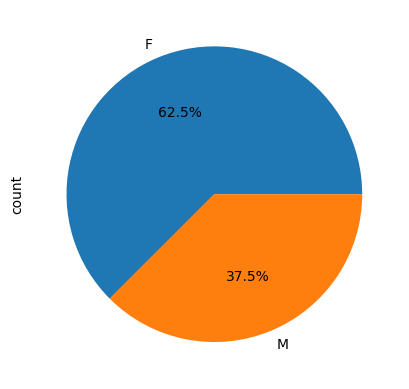

In [117]:
#כמות נשים לעומת גברים בפאי פלוט
df1.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

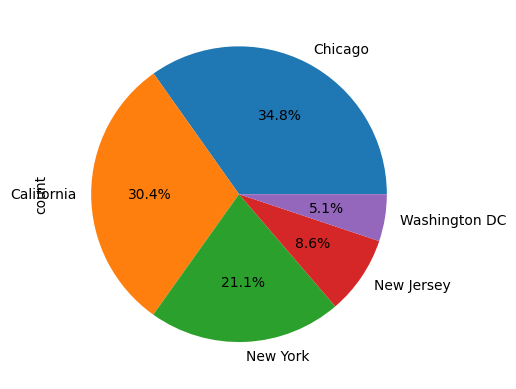

In [118]:
#ייצוג בפאי פלוט של הערים מהם מגיעים הקונים
df1.Location.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

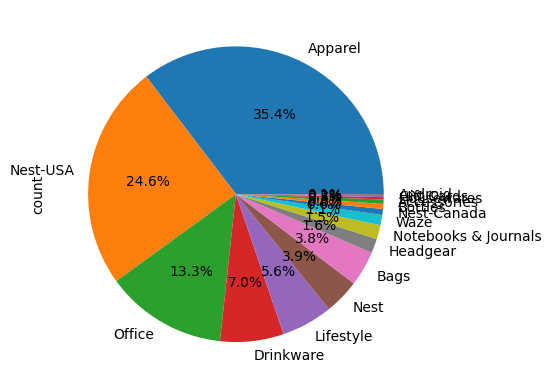

In [119]:
#ייצוג בפאי פלוט של הקטגוריות קנייה של הצרכנים
df1.Product_Category.value_counts().plot(kind='pie',autopct='%1.1f%%')

# Plot Numeric Data

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Tenure_Months'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Avg_Price'}>,
        <Axes: title={'center': 'Delivery_Charges'}>,
        <Axes: title={'center': 'GST'}>],
       [<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Offline_Spend'}>,
        <Axes: title={'center': 'Online_Spend'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Discount_pct'}>, <Axes: >]], dtype=object)

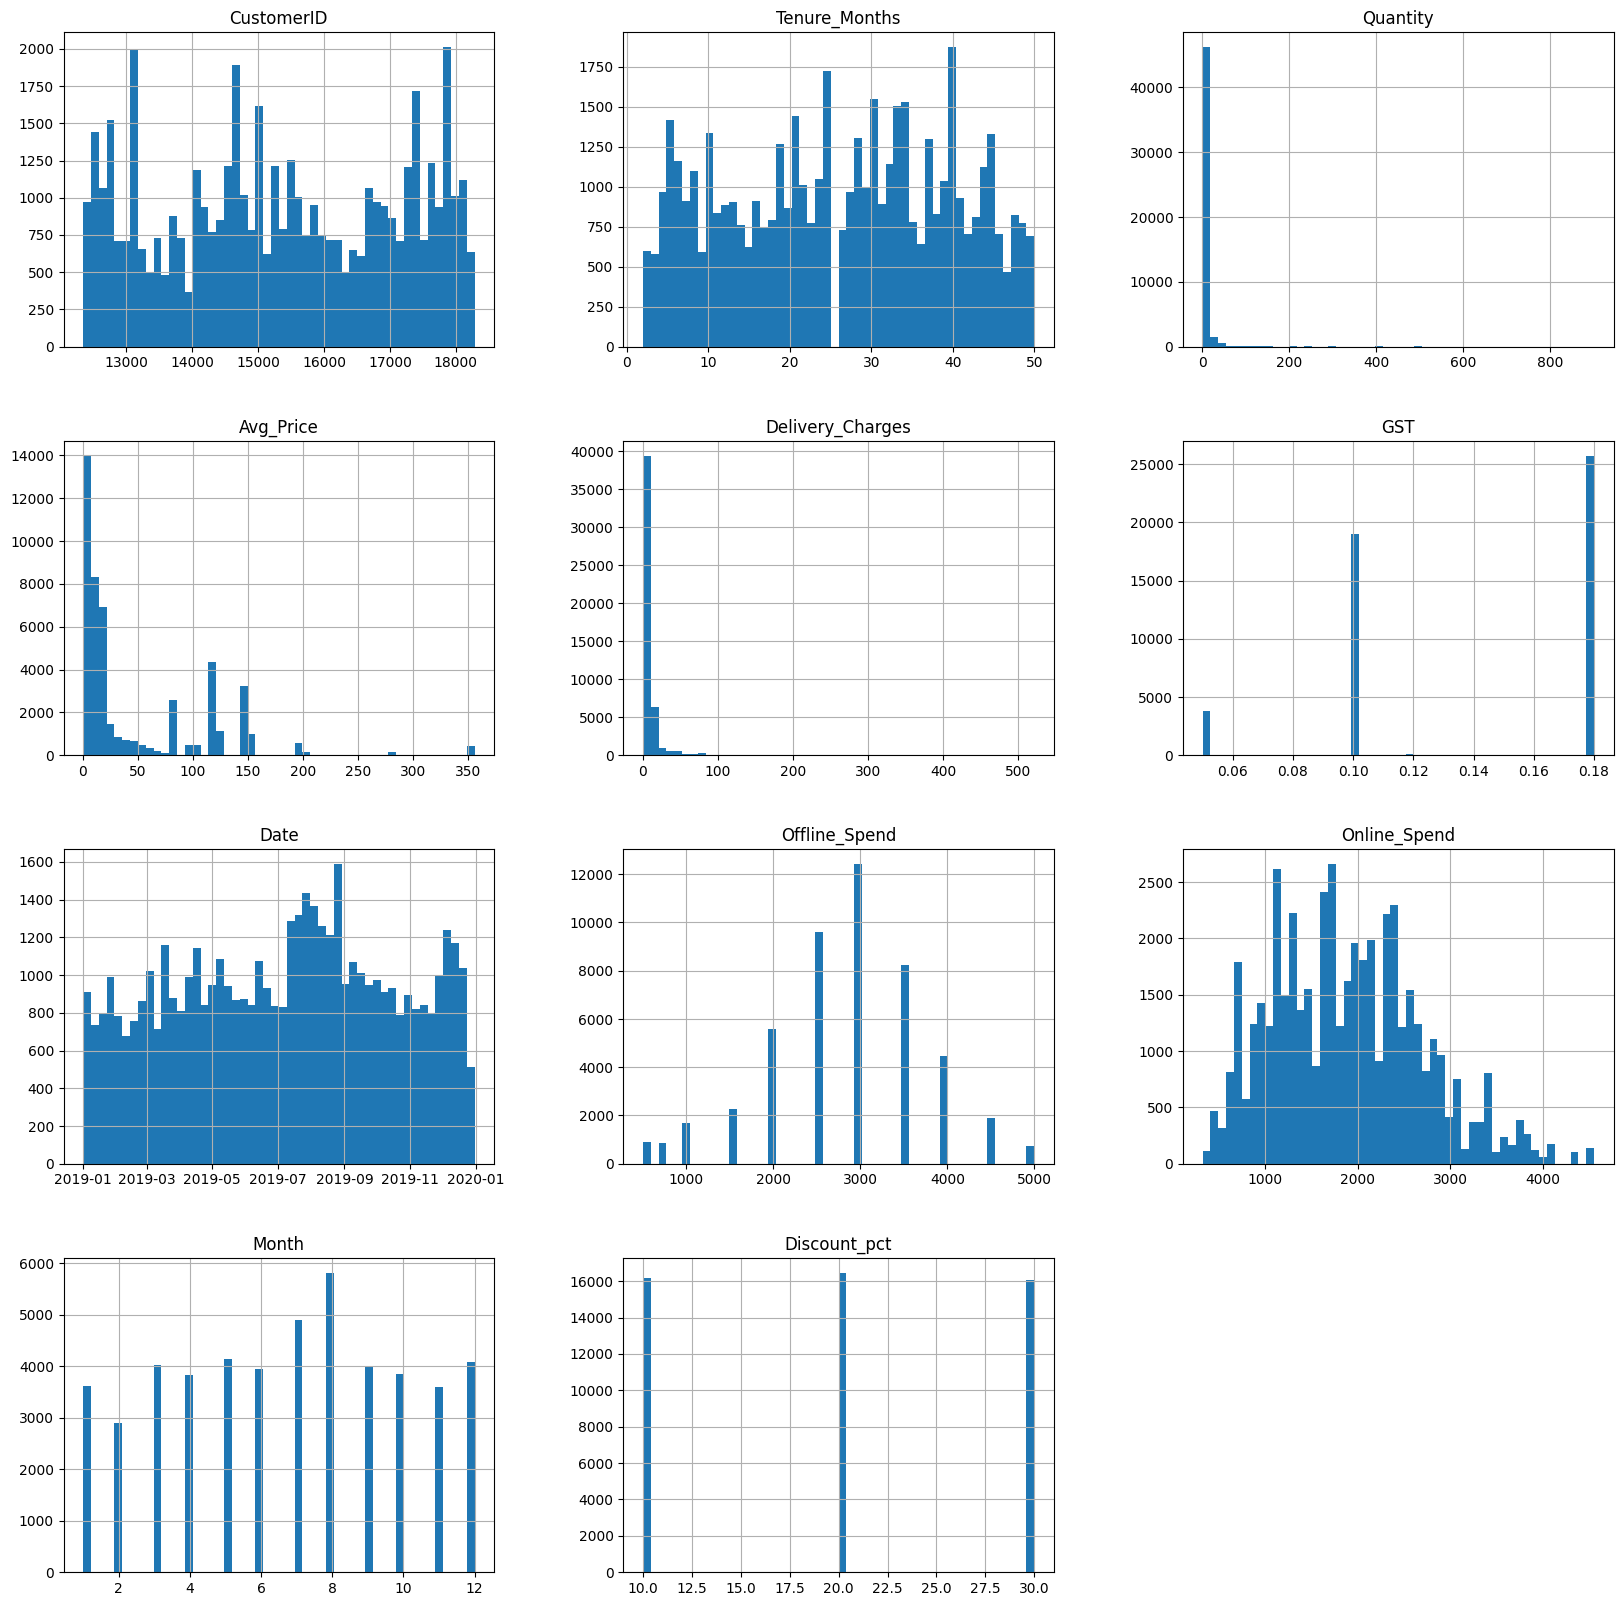

In [120]:
#היסטוגרמות הן כלי בסיסי לחקר נתונים, המספקות תובנות לגבי התפלגות ומאפיינים של נתונים מספריים.
# הדגש כיצד ניתן להשתמש בהם כדי לזהות מגמות, דפוסים ובעיות פוטנציאליות בנתונים.

df.hist(figsize=(20,20),bins=50)

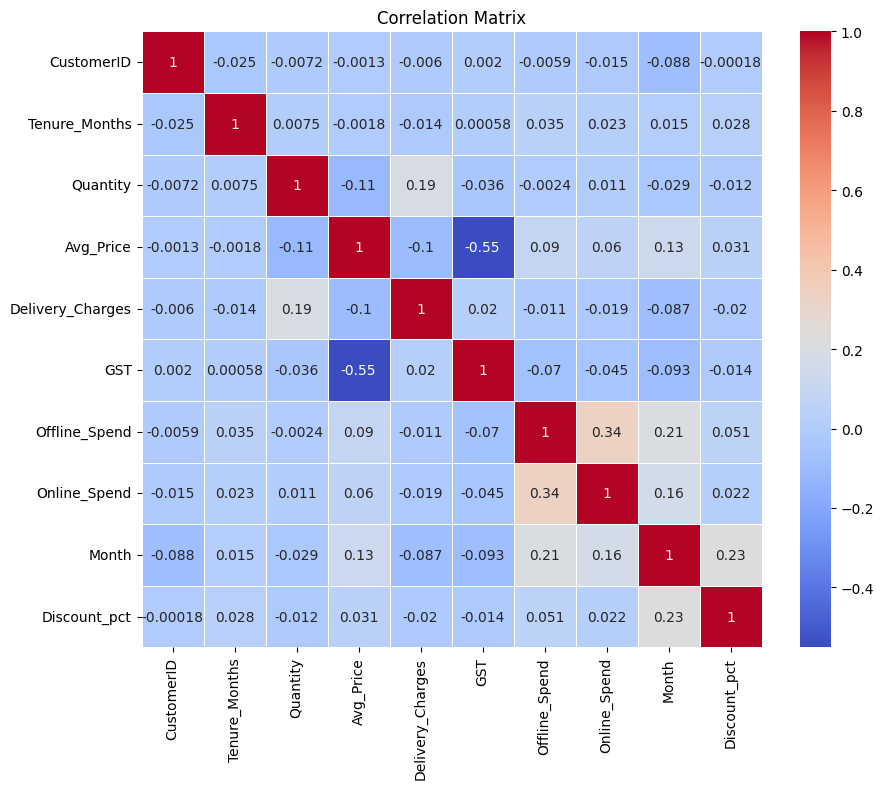

In [121]:
#show correlathion metrix for numerical data only
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#פירוש מתאמים: מקדמי המתאם נעים בין -1 ל-1.
#ערכים קרובים ל-1 או -1 מצביעים על מתאמים חזקים
# בעוד שערכים קרובים ל-0 מצביעים על מתאמים חלשים.

# Box Plot

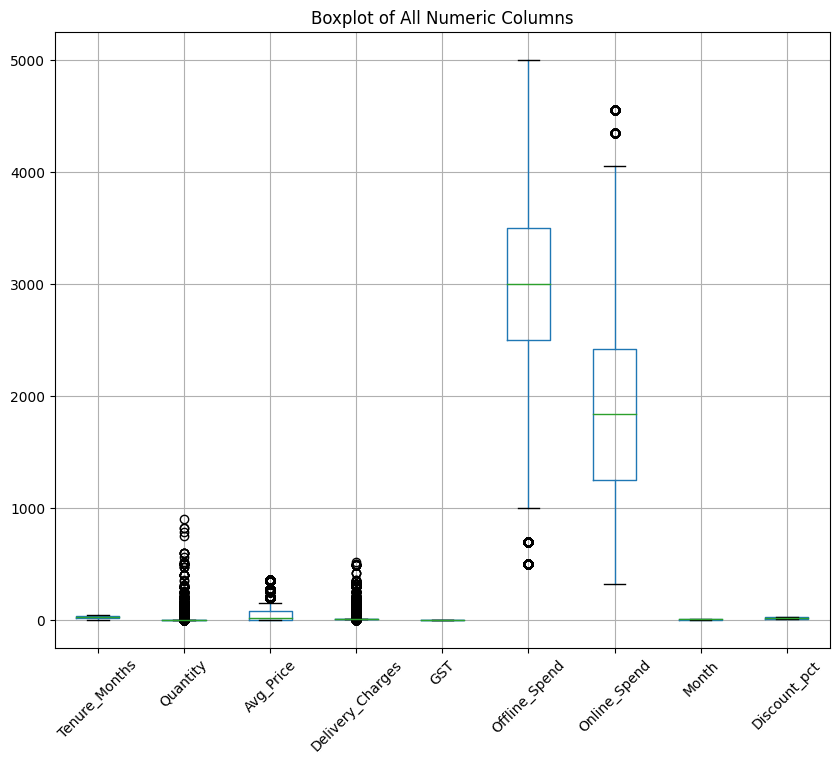

In [122]:

numeric_df = df1.select_dtypes(include='number').drop(columns=['CustomerID'])

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
numeric_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()

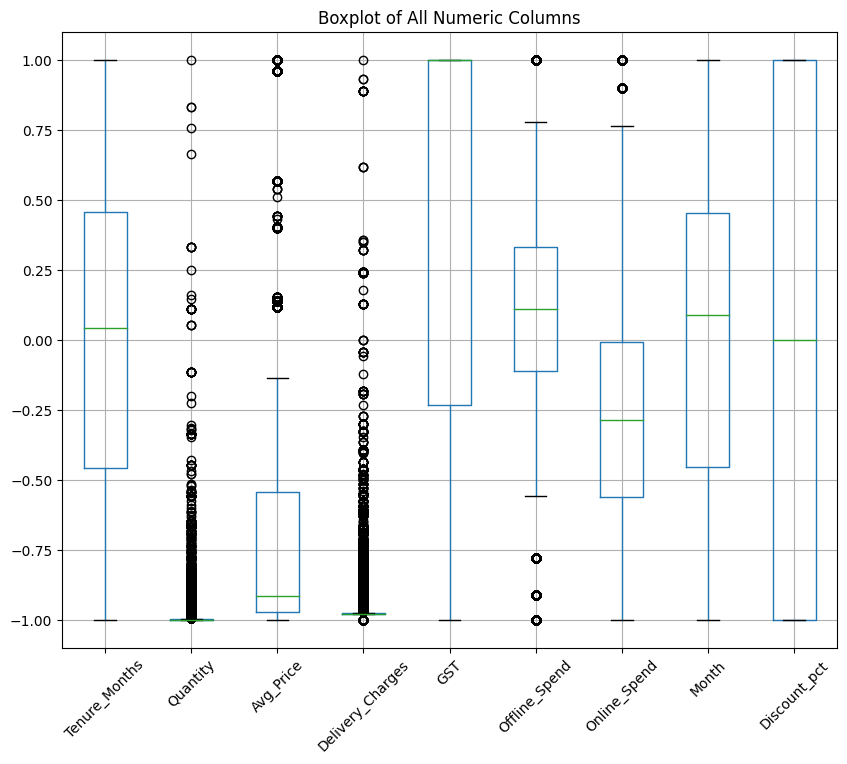

In [123]:


from sklearn.preprocessing import MinMaxScaler
numeric_df = df1.select_dtypes(include='number').drop(columns=['CustomerID'])
# Initialize MinMaxScaler with the feature range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
# Fit and transform the numeric data
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
normalized_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# IQR

In [124]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,48672.0,15335.558391,12346.0,13846.0,15311.0,16955.0,18283.0,1768.006302
Tenure_Months,48672.0,26.16829,2.0,15.0,27.0,37.0,50.0,13.480772
Quantity,48672.0,4.688178,1.0,1.0,1.0,2.0,900.0,20.870532
Avg_Price,48672.0,49.272918,0.39,5.25,15.99,81.5,355.74,62.420397
Delivery_Charges,48672.0,10.65196,0.0,6.0,6.0,6.5,521.36,19.707664
GST,48672.0,0.138463,0.05,0.1,0.18,0.18,0.18,0.045816
Date,48672,2019-07-06 11:59:33.372781056,2019-01-01 00:00:00,2019-04-13 00:00:00,2019-07-14 00:00:00,2019-09-26 00:00:00,2019-12-31 00:00:00,NaN
Offline_Spend,48672.0,2825.49926,500.0,2500.0,3000.0,3500.0,5000.0,932.67108
Online_Spend,48672.0,1892.969416,320.25,1252.63,1837.87,2424.97,4556.93,804.188298
Month,48672.0,6.674741,1.0,4.0,7.0,9.0,12.0,3.307893


# Extreme Points

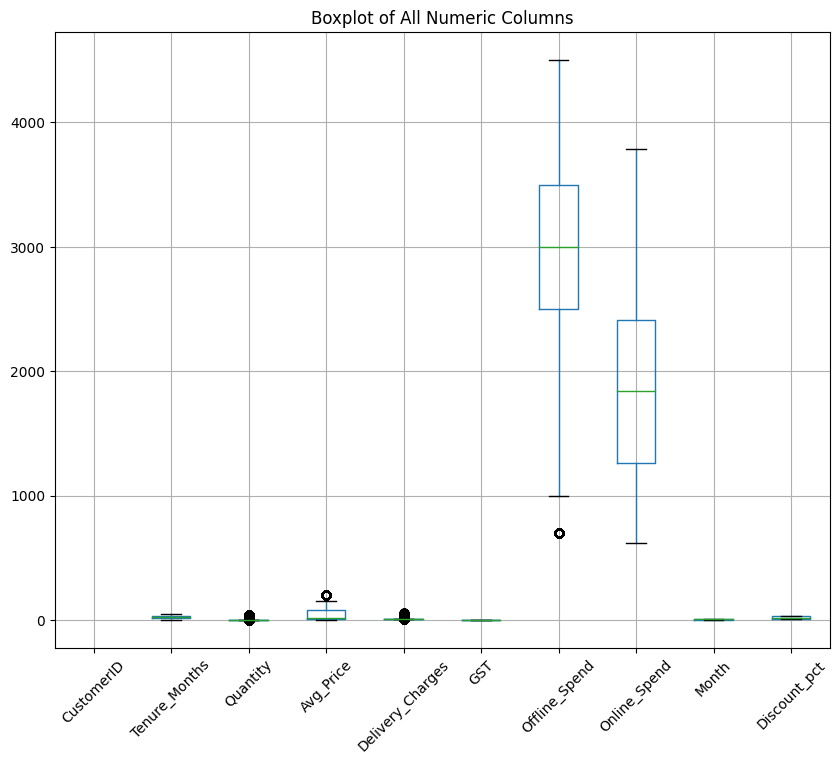

In [125]:


# Calculate the 1st and 99th percentiles for each numeric column
lower_bound = numeric_df.quantile(0.02)
upper_bound = numeric_df.quantile(0.98)

# Filter the DataFrame to include only data within the 1st and 99th percentiles
filtered_df = df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)]

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
filtered_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()


In [126]:
filtered_df = df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)]
filtered_df

,CustomerID,Gender,Location,Tenure_Months,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,NaN,NaN,NaN,12.0,NaN,NaN,1.0,153.71,6.5,NaN,0.10,NaT,4500.0,2424.50,1,10.0
2,NaN,NaN,NaN,12.0,NaN,NaN,2.0,122.77,6.5,NaN,0.10,NaT,4500.0,2424.50,1,10.0
3,NaN,NaN,NaN,12.0,NaN,NaN,1.0,81.50,6.5,NaN,0.10,NaT,4500.0,2424.50,1,10.0
4,NaN,NaN,NaN,12.0,NaN,NaN,1.0,153.71,6.5,NaN,0.10,NaT,4500.0,2424.50,1,10.0
6,NaN,NaN,NaN,12.0,NaN,NaN,2.0,153.71,6.5,NaN,0.10,NaT,4500.0,2424.50,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,NaN,NaN,NaN,8.0,NaN,NaN,1.0,NaN,NaN,NaN,0.05,NaT,2500.0,1294.22,3,30.0
52920,NaN,NaN,NaN,34.0,NaN,NaN,1.0,25.00,NaN,NaN,0.05,NaT,2000.0,1066.12,3,30.0
52921,NaN,NaN,NaN,15.0,NaN,NaN,1.0,10.80,6.0,NaN,0.05,NaT,3000.0,2230.76,10,10.0
52922,NaN,NaN,NaN,15.0,NaN,NaN,1.0,9.60,6.0,NaN,0.05,NaT,3000.0,2230.76,10,10.0


# KNN

In [127]:
df1.columns


Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Discount_pct'],
      dtype='object')

In [8]:
#df1.columns
selected_columns = ['Gender', 'Location', 'Tenure_Months','Product_Category','Quantity', 'Avg_Price', 'Delivery_Charges','Coupon_Status','GST','Offline_Spend' ,'Online_Spend','Month','Discount_pct']
#sel_df= df1.loc[:, selected_columns]
#df1.reset_index()
sel_df = df1[selected_columns]
sel_df.info()

NameError: name 'df1' is not defined

In [7]:
categorical_columns = sel_df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
# Set sparse_output to False to avoid generating sparse matrices
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid the dummy variable trap
# Apply one-hot encoding to all categorical columns
encoded_data = ohe.fit_transform(sel_df[categorical_columns])

# Convert the encoded data to a DataFrame and concatenate it with the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([sel_df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.info()


df_cleaned = df_encoded.dropna()
df_cleaned.info()




NameError: name 'sel_df' is not defined

### Common Train Data

In [130]:

X = df_cleaned.drop('Avg_Price', axis=1)
y = df_cleaned['Avg_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mse_dict = {}
for n in range(1, 30):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[n] = mse
  print("Mean Squared Error:", mse)


opt_n = min(mse_dict, key=mse_dict.get)
print(f"The key with the minimum value is '{opt_n}' with a value of {mse_dict[opt_n]}.")

Mean Squared Error: 2071.9819781323217
Mean Squared Error: 1748.3226159907397
Mean Squared Error: 1647.4451680290576
Mean Squared Error: 1626.0478600363997
Mean Squared Error: 1628.7611414352339
Mean Squared Error: 1621.8222497951456
Mean Squared Error: 1619.439913476264
Mean Squared Error: 1628.9928604143422
Mean Squared Error: 1637.8207081626383
Mean Squared Error: 1643.2275074366844
Mean Squared Error: 1658.8315077055997
Mean Squared Error: 1670.304804845228
Mean Squared Error: 1684.3412470723492
Mean Squared Error: 1696.510921759581
Mean Squared Error: 1701.5116650665577
Mean Squared Error: 1710.9117687220203
Mean Squared Error: 1722.1117017467427
Mean Squared Error: 1727.3126363181696
Mean Squared Error: 1733.6215079351155
Mean Squared Error: 1741.6081742330136
Mean Squared Error: 1745.7853942416075
Mean Squared Error: 1752.9523153315097
Mean Squared Error: 1764.428320623538
Mean Squared Error: 1774.3368798306424
Mean Squared Error: 1780.694299205016
Mean Squared Error: 1787.27330

In [ ]:

# Serialize the model to a file using pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


# LASSO Regression

In [40]:
# Initializing the Lasso model with a specific alpha value
mse_dict = {}
# Adding ranges converted to floats
alphas = [0.0001, 0.00025, 0.0005, 0.00075]
alphas += [0.001, 0.0025, 0.005, 0.0075]
alphas += [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_scaled, y_train)
  y_pred = lasso.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[alpha] = {'mse': mse, 'coefficients': lasso.coef_}
  print("Mean Squared Error:", mse)

opt_alpha = min(mse_dict, key=lambda x: mse_dict[x]['mse'])
print(f"The key with the minimum value is '{opt_alpha}' with a value of {mse_dict[opt_alpha]}.")
print(f"The coefficients are {mse_dict[opt_alpha]['coefficients']}.")

#plot mse
plt.figure(figsize=(10, 6))
plt.plot(list(mse_dict.keys()), [mse_dict[alpha]['mse'] for alpha in mse_dict], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')

NameError: name 'X_train_scaled' is not defined

In [ ]:
alpha = 0.75
print(f"The coefficients are {mse_dict[alpha]['coefficients']}.")
print(f"The num of zero coefficients are ",np.count_nonzero(mse_dict[alpha]['coefficients']))
#מאפסים בלאסו, ככל שאלפה יותר גדול ככה הפיצרים מתאפסים

# Ridge Regreshion

In [ ]:
# Initializing the Lasso model with a specific alpha value
mse_dict = {}
# Adding ranges converted to floats
alphas = [0.0001, 0.00025, 0.0005, 0.00075]
alphas += [0.001, 0.0025, 0.005, 0.0075]
alphas += [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]
alphas += [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75]
#alphas += [float(x) for x in range(1, 10)]
#alphas += [float(x) for x in range(10, 100, 10)]

#grid search of optimal alpha
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled, y_train)
  y_pred = ridge.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[alpha] = {'mse': mse, 'coefficients': ridge.coef_}
  print("Mean Squared Error:", mse)

opt_alpha = min(mse_dict, key=lambda x: mse_dict[x]['mse'])
print(f"The key with the minimum value is '{opt_alpha}' with a value of {mse_dict[opt_alpha]}.")
#print(f"The coefficients are {mse_dict[opt_alpha]['coefficients']}.")

#plot mse
plt.figure(figsize=(10, 6))
plt.plot(list(mse_dict.keys()), [mse_dict[alpha]['mse'] for alpha in mse_dict], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')

# Gradient Boosting

In [ ]:

# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss="squared_error",n_estimators=500 ,subsample=0.5, learning_rate=0.1, max_depth=3, random_state=42)
#learning_rate=0.01 , 0.05,0.1,0.2 max_depth=3-6

# Fitting the model
gbr.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = gbr.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Checking feature importance
print(f"Feature Importances: {gbr.feature_importances_}")

#def __init__(*, loss='squared_error',
#  learning_rate=0.1,
#   n_estimators=100,
#    subsample=0.5,
#     min_samples_split=2,
# min_samples_leaf=1,
# max_depth=3,
#          max_leaf_nodes=None,


In [ ]:
#plot Feature Importances in descend order
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
